## Assignment 2

### Task 2: Create Training Data for Incomplete Journeys

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_parquet("data/journeys_flattened.parquet")

In [3]:
end_timestamp = pd.Timestamp('2023-01-23 12:29:56+0000', tz='UTC')

In [4]:
df.head()

,id,events,event_names,timestamps,journey_length
0,-1000001271 551641434,"[12, 4, 19, 19, 19, 2, 4]","[application_web_approved, browse_products, ap...","[2022-10-31T13:45:59.000000, 2022-10-31T13:47:...",7
1,-100000293 92584960,"[12, 4, 4, 4, 4, 4, 4, 4, 11, 4, 4, 11, 4, 11,...","[application_web_approved, browse_products, br...","[2021-11-11T01:30:43.000000, 2021-11-11T01:39:...",31
2,-100001025 -1674572031,"[2, 19, 1, 19, 19, 19, 19, 19, 19, 19, 3, 19, ...","[campaign_click, application_web_view, promoti...","[2022-05-09T06:00:00.000000, 2022-05-09T13:10:...",26
3,-1000011207 -1448136887,"[12, 4, 11, 5, 5, 5, 4, 5, 4, 4, 4, 4, 1, 4, 4...","[application_web_approved, browse_products, ad...","[2021-03-21T11:19:48.000000, 2021-03-21T11:27:...",61
4,-100001164 -1710062169,[15],[application_phone_approved],[2022-12-02T07:45:16.000000],1


In [5]:
outcomes = []
for row in df.itertuples(index=False):
    if 28 in row.events:
        outcomes.append('successful')
    elif (end_timestamp - pd.Timestamp(row.timestamps[-1], tz='UTC')) / np.timedelta64(1, 'D') > 60:
        outcomes.append('unsuccessful')
    else:
        outcomes.append('ongoing')

In [6]:
df['outcome'] = outcomes

In [7]:
df.head()

,id,events,event_names,timestamps,journey_length,outcome
0,-1000001271 551641434,"[12, 4, 19, 19, 19, 2, 4]","[application_web_approved, browse_products, ap...","[2022-10-31T13:45:59.000000, 2022-10-31T13:47:...",7,ongoing
1,-100000293 92584960,"[12, 4, 4, 4, 4, 4, 4, 4, 11, 4, 4, 11, 4, 11,...","[application_web_approved, browse_products, br...","[2021-11-11T01:30:43.000000, 2021-11-11T01:39:...",31,unsuccessful
2,-100001025 -1674572031,"[2, 19, 1, 19, 19, 19, 19, 19, 19, 19, 3, 19, ...","[campaign_click, application_web_view, promoti...","[2022-05-09T06:00:00.000000, 2022-05-09T13:10:...",26,unsuccessful
3,-1000011207 -1448136887,"[12, 4, 11, 5, 5, 5, 4, 5, 4, 4, 4, 4, 1, 4, 4...","[application_web_approved, browse_products, ad...","[2021-03-21T11:19:48.000000, 2021-03-21T11:27:...",61,unsuccessful
4,-100001164 -1710062169,[15],[application_phone_approved],[2022-12-02T07:45:16.000000],1,ongoing


In [8]:
print(f"There are {df[df['outcome'] == 'successful'].shape[0]} successful journeys")
print(f"There are {df[df['outcome'] == 'unsuccessful'].shape[0]} unsuccessful journeys")
print(f"There are {df[df['outcome'] == 'ongoing'].shape[0]} ongoing journeys")

There are 279363 successful journeys
There are 992757 unsuccessful journeys
There are 158325 ongoing journeys


In [9]:
# Percentages by outcome type
print(279363 / df.shape[0] * 100)
print(992757 / df.shape[0] * 100)
print(158325 / df.shape[0] * 100)

19.52979667166511
69.40196931724044
11.06823401109445


In [10]:
training_dataset = df[df['outcome'] != 'ongoing'].copy()

In [11]:
train_df, val_df = train_test_split(training_dataset, test_size=0.3, random_state=0)

In [12]:
train_df.head()

,id,events,event_names,timestamps,journey_length,outcome
660887,-852439946 -1609050057,"[19, 3, 19, 19, 3, 19, 19, 19, 3, 19, 19, 3, 1...","[application_web_view, application_web_submit,...","[2021-05-21T11:12:10.000000, 2021-05-21T11:12:...",84,unsuccessful
783676,1184641622 -79912025,"[12, 4, 4, 4, 1, 21, 1, 1, 21, 1, 21, 1, 1]","[application_web_approved, browse_products, br...","[2021-11-13T06:26:36.000000, 2021-11-13T06:31:...",13,unsuccessful
922354,1559951289 -1770709320,"[19, 19, 19, 19, 19, 19, 19, 3, 19, 12, 4, 5, ...","[application_web_view, application_web_view, a...","[2022-09-27T13:52:41.000000, 2022-09-27T13:52:...",26,unsuccessful
702590,-965019597 1796683799,"[2, 12, 19, 19, 1, 1, 21, 1, 1, 21, 4]","[campaign_click, application_web_approved, app...","[2022-02-25T06:00:00.000000, 2022-02-25T13:12:...",11,unsuccessful
894119,148407810 -1008407170,"[4, 11, 5, 6, 19, 19, 6, 19, 19, 19, 19, 19, 1...","[browse_products, add_to_cart, view_cart, begi...","[2022-07-30T21:09:12.000000, 2022-07-30T21:09:...",18,unsuccessful


In [14]:
train_df.loc[1, 'timestamps'][np.where(train_df.loc[1, 'events'] == 28)[0][0]]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# Set seed for reproducibility
np.random.seed(742)

samples = []

for row in train_df.itertuples(index=False):
    # Get random time splits accordingly based on 
    if row.outcome == 'successful':
        first_event = row.timestamps[0]
        last_event = row.timestamps[np.where(row.events == 28)[0][0]]
        # last_event = row.timestamps[-1]
        time_splits = first_event + (last_event - first_event) * np.random.random(size=5)
    else:
        first_event = row.timestamps[0]
        end_cutoff = row.timestamps[-1] + np.timedelta64(60, 'D')
        time_splits = first_event + (end_cutoff - first_event) * np.random.random(size=5)

    # Split training data accordingly
    for split in time_splits:
        journey_steps = (row.timestamps <= split).sum()
        samples.append([
            row.id,
            row.events[:journey_steps],
            row.event_names[:journey_steps],
            row.timestamps[:journey_steps],
            journey_steps,
            row.outcome,
            split
        ])

In [ ]:
complete_train_df = pd.DataFrame(samples, columns=train_df.columns.tolist() + ["current_datetime"])

In [ ]:
complete_train_df.head()

,id,events,event_names,timestamps,journey_length,outcome,current_datetime
0,-1007956496 -1081517730,"[2, 12]","[campaign_click, application_web_approved]","[2021-05-13T06:00:00.000000, 2021-05-13T09:35:...",2,unsuccessful,2021-05-13 16:22:05.036912
1,-1007956496 -1081517730,"[2, 12, 4, 4, 1, 24, 4, 4, 4, 4, 4, 4, 4, 24, ...","[campaign_click, application_web_approved, bro...","[2021-05-13T06:00:00.000000, 2021-05-13T09:35:...",107,unsuccessful,2021-07-16 15:15:17.604106
2,-1007956496 -1081517730,"[2, 12, 4, 4, 1, 24, 4, 4, 4, 4, 4, 4, 4, 24, ...","[campaign_click, application_web_approved, bro...","[2021-05-13T06:00:00.000000, 2021-05-13T09:35:...",112,unsuccessful,2021-10-11 16:18:48.441843
3,-1007956496 -1081517730,"[2, 12, 4, 4, 1, 24, 4, 4, 4, 4, 4, 4, 4, 24, ...","[campaign_click, application_web_approved, bro...","[2021-05-13T06:00:00.000000, 2021-05-13T09:35:...",110,unsuccessful,2021-08-24 03:28:00.892592
4,-1007956496 -1081517730,"[2, 12, 4, 4, 1, 24, 4, 4, 4, 4, 4, 4, 4, 24, ...","[campaign_click, application_web_approved, bro...","[2021-05-13T06:00:00.000000, 2021-05-13T09:35:...",116,unsuccessful,2022-01-21 02:33:36.409418


In [ ]:
complete_train_df.shape

(4452420, 7)

We now have almost 4.5 million training samples which look like ongoing journeys but have actual labels.

Let's now do the same for our validation samples so that we are able to test the generalizability of our models.

In [ ]:
# Set seed for reproducibility
np.random.seed(284)

val_samples = []

for row in val_df.itertuples(index=False):
    # Get random time splits accordingly based on 
    if row.outcome == 'successful':
        first_event = row.timestamps[0]
        last_event = row.timestamps[-1]
        time_splits = first_event + (last_event - first_event) * np.random.random(size=5)
    else:
        first_event = row.timestamps[0]
        end_cutoff = row.timestamps[-1] + np.timedelta64(60, 'D')
        time_splits = first_event + (end_cutoff - first_event) * np.random.random(size=5)

    # Split training data accordingly
    for split in time_splits:
        journey_steps = (row.timestamps <= split).sum()
        val_samples.append([
            row.id,
            row.events[:journey_steps],
            row.event_names[:journey_steps],
            row.timestamps[:journey_steps],
            journey_steps,
            row.outcome,
            split
        ])

In [ ]:
complete_val_df = pd.DataFrame(val_samples, columns=val_df.columns.tolist() + ["current_datetime"])

In [ ]:
complete_val_df.head()

,id,events,event_names,timestamps,journey_length,outcome,current_datetime
0,627912839 -771509774,"[12, 4, 4, 11, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4...","[application_web_approved, browse_products, br...","[2021-08-17T04:57:33.000000, 2021-08-17T04:59:...",46,successful,2021-08-30 13:34:52.790030
1,627912839 -771509774,"[12, 4, 4, 11, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4...","[application_web_approved, browse_products, br...","[2021-08-17T04:57:33.000000, 2021-08-17T04:59:...",22,successful,2021-08-18 20:13:26.258323
2,627912839 -771509774,"[12, 4, 4, 11, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4...","[application_web_approved, browse_products, br...","[2021-08-17T04:57:33.000000, 2021-08-17T04:59:...",22,successful,2021-08-17 13:50:27.546528
3,627912839 -771509774,"[12, 4, 4, 11, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4...","[application_web_approved, browse_products, br...","[2021-08-17T04:57:33.000000, 2021-08-17T04:59:...",49,successful,2021-08-31 01:56:17.208647
4,627912839 -771509774,"[12, 4, 4, 11, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4...","[application_web_approved, browse_products, br...","[2021-08-17T04:57:33.000000, 2021-08-17T04:59:...",22,successful,2021-08-19 06:49:37.226909


In [ ]:
complete_val_df.shape

(1908180, 7)

We have nearly 2 million validation samples to test our models.

In [ ]:
# Shuffle rows so that splits from the same journey are not grouped together
complete_train_df = complete_train_df.sample(frac=1, random_state=523).reset_index(drop=True)
complete_val_df = complete_val_df.sample(frac=1, random_state=784).reset_index(drop=True)

In [ ]:
complete_train_df.to_parquet('data/training_data.parquet', index=False)
complete_val_df.to_parquet('data/validation_data.parquet', index=False)

In [ ]:
# Create indicator features for all events
for i in range(1, 30):
    if i not in (17, 25, 28):
        complete_train_df[f"event{i}"] = [i in ev for ev in complete_train_df["events"]]
        complete_val_df[f"event{i}"] = [i in ev for ev in complete_val_df["events"]]

In [ ]:
# Add a feature that measures the time difference between the cutoff timestamp and the last action
complete_train_df["time_diff"] = [
    cur - ts[-1] for ts, cur in zip(complete_train_df["timestamps"], complete_train_df["current_datetime"])
]
complete_val_df["time_diff"] = [
    cur - ts[-1] for ts, cur in zip(complete_val_df["timestamps"], complete_val_df["current_datetime"])
]

In [ ]:
# Add a feature that measures the maximum time difference between any two actions during the user's journey
complete_train_df['max_days_between_actions'] = [np.diff(timestamps).max() / np.timedelta64(1, 'D') if len(timestamps) > 1 else np.nan for timestamps in complete_train_df['timestamps']]
complete_val_df['max_days_between_actions'] = [np.diff(timestamps).max() / np.timedelta64(1, 'D') if len(timestamps) > 1 else np.nan for timestamps in complete_val_df['timestamps']]

In [ ]:
complete_train_df.head()

,id,events,event_names,timestamps,journey_length,outcome,current_datetime,event1,event2,event3,...,event20,event21,event22,event23,event24,event26,event27,event29,time_diff,max_days_between_actions
0,-712992947 315636321,"[21, 19, 19, 19, 19, 19, 3, 19, 12]","[catalog_(mail), application_web_view, applica...","[2022-09-19T00:00:00.000000, 2022-09-29T09:39:...",9,unsuccessful,2022-10-20 19:21:34.492834,False,False,True,...,False,True,False,False,False,False,False,False,21 days 09:39:37.492834,10.402442
1,-1053824707 805182384,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[browse_products, browse_products, browse_prod...","[2021-04-02T16:35:23.000000, 2021-04-02T16:43:...",38,unsuccessful,2021-12-10 02:37:55.729429,True,False,True,...,False,False,False,False,False,False,False,False,85 days 01:36:34.729429,51.005567
2,-2030006156 518223926,"[12, 1, 4, 11, 5, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4...","[application_web_approved, promotion_created, ...","[2021-09-27T03:46:44.000000, 2021-09-27T03:46:...",58,unsuccessful,2022-06-06 02:07:01.042777,True,False,False,...,False,True,False,False,False,False,False,False,33 days 19:06:38.042777,34.722778
3,1473063940 995988097,"[2, 19, 19, 19, 19, 19, 19, 19, 19, 19, 3, 12,...","[campaign_click, application_web_view, applica...","[2021-11-08T06:00:00.000000, 2021-11-08T18:49:...",29,unsuccessful,2022-03-16 11:22:48.562733,True,True,True,...,False,False,False,False,True,False,False,False,92 days 17:36:20.562733,27.998380
4,-1011630484 658044462,"[2, 12, 4, 11, 1, 24, 24, 4, 4, 4, 4, 4, 4, 11...","[campaign_click, application_web_approved, bro...","[2021-03-25T06:00:00.000000, 2021-03-25T17:40:...",34,unsuccessful,2021-04-02 18:24:33.014571,True,True,False,...,False,False,False,False,True,False,False,False,4 days 15:55:56.014571,2.933403


In [ ]:
complete_val_df.head()

,id,events,event_names,timestamps,journey_length,outcome,current_datetime,event1,event2,event3,...,event20,event21,event22,event23,event24,event26,event27,event29,time_diff,max_days_between_actions
0,-1138166351 1783644929,"[2, 12, 4, 4, 4, 4, 4, 4, 11, 5]","[campaign_click, application_web_approved, bro...","[2022-04-23T06:00:00.000000, 2022-04-23T16:49:...",10,successful,2022-05-04 11:05:20.071959,False,True,False,...,False,False,False,False,False,False,False,False,10 days 17:33:02.071959,0.450718
1,-286770693 977659056,"[2, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 3,...","[campaign_click, application_web_view, applica...","[2022-01-03T06:00:00.000000, 2022-01-03T19:10:...",44,unsuccessful,2022-07-17 23:18:36.810833,True,True,True,...,False,True,False,False,True,False,False,True,28 days 03:18:08.810833,125.833657
2,1771730874 1724627154,[1],[promotion_created],[2021-08-31T15:59:59.000000],1,successful,2021-09-15 20:24:19.088999,True,False,False,...,False,False,False,False,False,False,False,False,15 days 04:24:20.088999,NaN
3,-982940279 -1225587020,"[2, 19, 19, 19, 19, 19, 19, 3, 19, 19, 3, 19, ...","[campaign_click, application_web_view, applica...","[2022-03-07T06:00:00.000000, 2022-03-07T19:00:...",20,unsuccessful,2022-04-05 18:33:43.927522,False,True,True,...,False,False,False,False,False,False,False,False,28 days 01:46:20.927522,0.851759
4,942673920 1636467897,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[browse_products, browse_products, browse_prod...","[2021-05-25T20:46:04.000000, 2021-05-25T20:49:...",27,successful,2021-05-31 00:26:24.845808,False,False,False,...,False,False,False,False,False,False,False,False,4 days 03:52:53.845808,0.936238


In [ ]:
feature_cols = [
    col for col in complete_train_df.columns
    if col.startswith("event") and not col in ["events", "event_names"] or col in ["journey_length", "time_diff", "max_days_between_actions"]
]

X_train = complete_train_df[feature_cols]
y_train = (complete_train_df["outcome"] == 'successful').astype('int')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train["time_diff"] = X_train["time_diff"].dt.total_seconds()
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=5,
    oob_score=True,
    random_state=62,
    n_jobs=-1
)

rf.fit(X_train, y_train)

C:\Users\david\AppData\Local\Temp\ipykernel_7824\3883949873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["time_diff"] = X_train["time_diff"].dt.total_seconds()


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [ ]:
rf.oob_score_

0.8932818557099286

In [ ]:
feature_cols = [
    col for col in complete_val_df.columns
    if col.startswith("event") and not col in ["events", "event_names"] or col in ["journey_length", "time_diff", "max_days_between_actions"]
]

X_val = complete_val_df[feature_cols]
y_val = (complete_val_df["outcome"] == 'successful').astype('int')

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
X_val["time_diff"] = X_val["time_diff"].dt.total_seconds()
y_pred = rf.predict(X_val)
y_prob = rf.predict_proba(X_val)[:, 1]

print("Accuracy:", accuracy_score(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_prob))


C:\Users\david\AppData\Local\Temp\ipykernel_7824\685255666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val["time_diff"] = X_val["time_diff"].dt.total_seconds()


Accuracy: 0.8912660231215085
ROC AUC: 0.9177430230481097


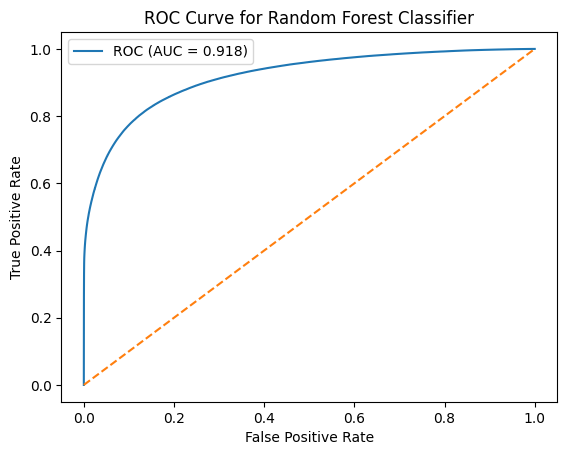

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_val, y_prob)
auc = roc_auc_score(y_val, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier")
plt.legend()
plt.show()

In [ ]:
importances = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(importances.head(10))

time_diff                   0.337158
max_days_between_actions    0.156526
event8                      0.128045
event7                      0.077314
event29                     0.071560
event27                     0.060183
event21                     0.043084
journey_length              0.034608
event12                     0.023843
event1                      0.012075
dtype: float64


In [ ]:
complete_train_df.to_parquet("data/training_data_with_features.parquet", index=False)
complete_val_df.to_parquet("data/validation_data_with_features.parquet", index=False)

In [ ]:
# =========================
# Neural Net baseline (CUDA) using the EXACT same X_train/X_val/y_train/y_val from your RF code
# (builds directly on your notebook variables)
# =========================

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, roc_auc_score

# ---- 0) Force CUDA (as requested)
assert torch.cuda.is_available(), "CUDA requested but not available"
device = torch.device("cuda")
print("Using device:", device)

# ---- 1) Use the SAME X/y that your RF used
# Your notebook does:
#   X_train["time_diff"] = X_train["time_diff"].dt.total_seconds()
#   X_val["time_diff"]   = X_val["time_diff"].dt.total_seconds()
#
# We'll do the same, but on copies so we don't mutate earlier cells.
X_train_nn = X_train.copy()
X_val_nn   = X_val.copy()

# Convert time_diff datetime/timedelta column to seconds (exactly like RF cell)
if "time_diff" in X_train_nn.columns:
    X_train_nn["time_diff"] = X_train_nn["time_diff"].dt.total_seconds()
if "time_diff" in X_val_nn.columns:
    X_val_nn["time_diff"] = X_val_nn["time_diff"].dt.total_seconds()

# Safety: coerce any non-numeric to numeric (NaN -> 0)
X_train_nn = X_train_nn.apply(pd.to_numeric, errors="coerce").fillna(0.0)
X_val_nn   = X_val_nn.apply(pd.to_numeric, errors="coerce").fillna(0.0)

# numpy -> torch
Xtr = torch.tensor(X_train_nn.to_numpy(dtype=np.float32), dtype=torch.float32)
Xva = torch.tensor(X_val_nn.to_numpy(dtype=np.float32), dtype=torch.float32)
ytr = torch.tensor(np.asarray(y_train, dtype=np.float32).reshape(-1), dtype=torch.float32)
yva = torch.tensor(np.asarray(y_val, dtype=np.float32).reshape(-1), dtype=torch.float32)

print("Xtr:", Xtr.shape, "Xva:", Xva.shape, "ytr:", ytr.shape, "yva:", yva.shape)

# ---- 2) DataLoaders
BATCH_SIZE = 512
train_loader = DataLoader(TensorDataset(Xtr, ytr), batch_size=BATCH_SIZE, shuffle=True, pin_memory=True)
val_loader   = DataLoader(TensorDataset(Xva, yva), batch_size=BATCH_SIZE, shuffle=False, pin_memory=True)

# ---- 3) Simple MLP (baseline)
in_dim = Xtr.shape[1]

class MLP(nn.Module):
    def __init__(self, d_in):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d_in, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1),
        )
    def forward(self, x):
        return self.net(x).squeeze(1)  # logits

model = MLP(in_dim).to(device)

# Optional: handle class imbalance similar to many baselines
pos = float((ytr == 1).sum().item())
neg = float((ytr == 0).sum().item())
pos_weight = torch.tensor([neg / max(pos, 1.0)], device=device, dtype=torch.float32)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

@torch.no_grad()
def eval_metrics():
    model.eval()
    all_probs, all_y = [], []
    for xb, yb in val_loader:
        xb = xb.to(device, non_blocking=True)
        logits = model(xb)
        probs = torch.sigmoid(logits).detach().cpu().numpy()
        all_probs.append(probs)
        all_y.append(yb.numpy())
    p = np.concatenate(all_probs)
    y = np.concatenate(all_y)

    preds = (p >= 0.5).astype(int)
    acc = accuracy_score(y, preds)
    # roc_auc_score requires both classes present; guard just in case
    auc = roc_auc_score(y, p) if len(np.unique(y)) == 2 else float("nan")
    return acc, auc

# ---- 4) Train (early stopping on val AUC)
EPOCHS = 12
patience = 3
best_auc = -1.0
bad = 0
best_state = None

for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0.0
    total_n = 0

    for xb, yb in train_loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)

        optimizer.zero_grad(set_to_none=True)
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        total_loss += float(loss.item()) * yb.numel()
        total_n += yb.numel()

    train_loss = total_loss / max(total_n, 1)
    val_acc, val_auc = eval_metrics()
    print(f"Epoch {epoch:02d} | train_loss={train_loss:.4f} | val_acc={val_acc:.4f} | val_auc={val_auc:.4f}")

    metric = val_auc if not np.isnan(val_auc) else val_acc
    if metric > best_auc + 1e-4:
        best_auc = metric
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
        bad = 0
    else:
        bad += 1
        if bad >= patience:
            print("Early stopping.")
            break

if best_state is not None:
    model.load_state_dict(best_state)
    model.to(device)

val_acc, val_auc = eval_metrics()
print("Final (best) val_acc:", val_acc, "| val_auc:", val_auc)

# ---- 5) Sklearn-like outputs (same as your RF eval cell)
@torch.no_grad()
def nn_predict(X_df):
    X_df = X_df.copy()
    if "time_diff" in X_df.columns:
        X_df["time_diff"] = X_df["time_diff"].dt.total_seconds()
    X_df = X_df.apply(pd.to_numeric, errors="coerce").fillna(0.0)
    xb = torch.tensor(X_df.to_numpy(dtype=np.float32), dtype=torch.float32, device=device)
    probs = torch.sigmoid(model(xb)).detach().cpu().numpy()
    preds = (probs >= 0.5).astype(int)
    return preds, probs

# Example (mirrors your RF metric cell):
# y_pred_nn, y_prob_nn = nn_predict(X_val)
# print("Accuracy:", accuracy_score(y_val, y_pred_nn))
# print("ROC AUC:", roc_auc_score(y_val, y_prob_nn))
